# **--------------Aerofit - Fitness equipment brand--------------**

*   Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**The company wants to know the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.**

**Variables considered in identifying characteristics of customer:**
*   Product Purchased:	KP281, KP481, or KP781
*   Age:	In years
*   Gender:	Male/Female
*   Education:	In years
*   MaritalStatus:	Single or partnered
*   Usage:	The average number of times the customer plans to use the treadmill each week.
*   Income:	Annual income (in $)
*   Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
*   Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**
*   The KP281 is an entry-level treadmill that sells for 1,500.
*   The KP481 is for mid-level runners that sell for 1,750.
*   The KP781 treadmill is having advanced features that sell for $2,500.

*   Importing necessary packages for EDA

In [894]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

*   **Importing/Reading the dataset for EDA**

In [895]:
A=pd.read_csv("aerofit_treadmill.csv")

In [896]:
A.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47



*   Shape Of The Dataset

In [897]:
A.shape

(180, 9)

The dataset contains 180 entries with 9 features.

*   **Characteristics of the dataset**

In [898]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


1.   Here in the dataset there are no null values.
2.   The datatypes of most of the columns is integer and few are objects.



*   **Correlation between the features**



In [899]:
A[['Age','Education','Miles','Income','Usage','Fitness']].corr()

,Age,Education,Miles,Income,Usage,Fitness
Age,1.000000,0.280496,0.036618,0.513414,0.015064,0.061105
Education,0.280496,1.000000,0.307284,0.625827,0.395155,0.410581
Miles,0.036618,0.307284,1.000000,0.543473,0.759130,0.785702
Income,0.513414,0.625827,0.543473,1.000000,0.519537,0.535005
Usage,0.015064,0.395155,0.759130,0.519537,1.000000,0.668606
Fitness,0.061105,0.410581,0.785702,0.535005,0.668606,1.000000


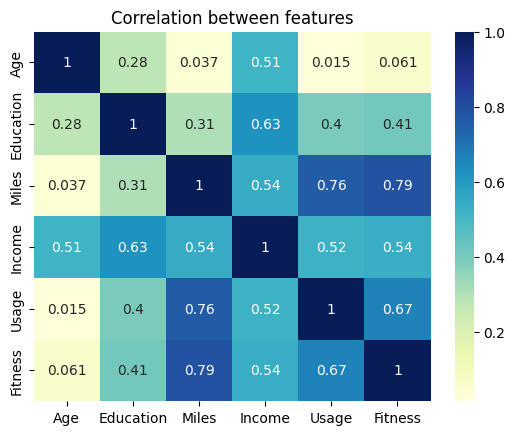

In [900]:
sns.heatmap(A[['Age','Education','Miles','Income','Usage','Fitness']].corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation between features")
plt.show()

From the correlation table:
*   Treadmill "Usage" is highly correlated with the "Miles" walked by the customer.
*   Customer "Fitness" is mostly correlated with the "Miles" walked by the customer.
*   Customer's "Income" is highly correlated with his "Education".

*   **Outlier Detection**

In [901]:
Outliers=['Age','Education','Miles','Income','Usage','Fitness']

**Box - Plots**

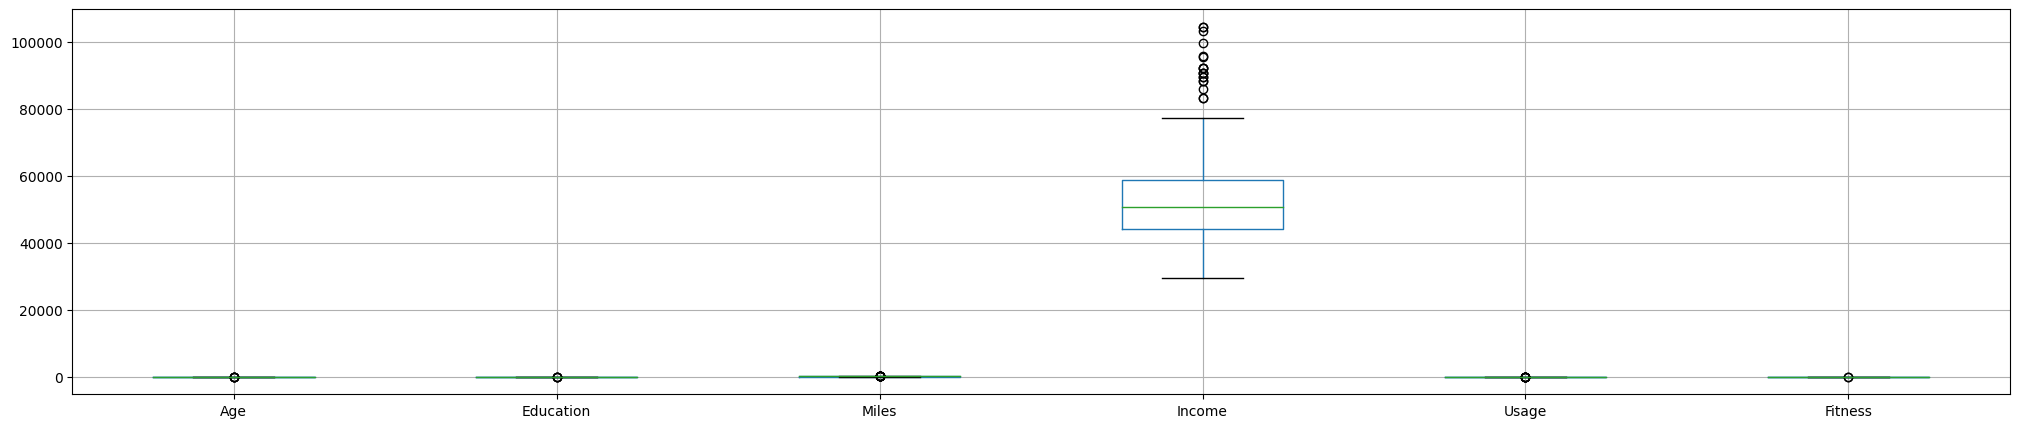

In [902]:
A[Outliers].boxplot(figsize=(25,5))
plt.show()

*   **Outlier Treatment**

In [903]:
A['Age']=np.clip(A['Age'], np.quantile(A['Age'], 0.05), np.quantile(A['Age'], 0.95))
A['Education']=np.clip(A['Education'], np.quantile(A['Education'], 0.05), np.quantile(A['Education'], 0.95))
A['Miles']=np.clip(A['Miles'], np.quantile(A['Miles'], 0.05), np.quantile(A['Miles'], 0.95))
A['Income']=np.clip(A['Income'], np.quantile(A['Income'], 0.05), np.quantile(A['Income'], 0.95))
A['Usage']=np.clip(A['Usage'], np.quantile(A['Usage'], 0.05), np.quantile(A['Usage'], 0.95))
A['Fitness']=np.clip(A['Fitness'], np.quantile(A['Fitness'], 0.05), np.quantile(A['Fitness'], 0.95))

In [904]:
A['Age']=A['Age'].round()
A['Usage']=A['Usage'].round()

*   **Marital Status impact on Product purchased**

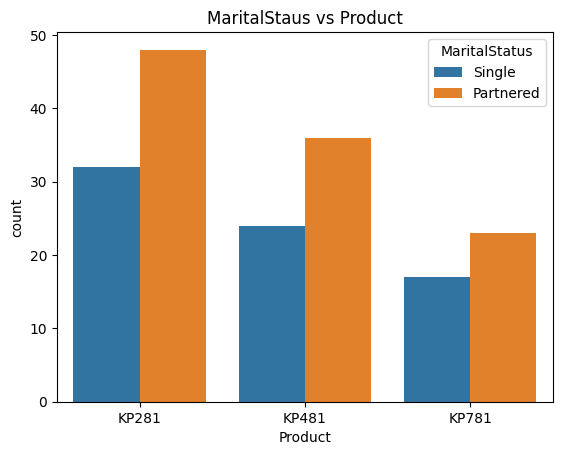

In [905]:
sns.countplot(x=A['Product'],hue = A['MaritalStatus'],data=A)
plt.title("MaritalStaus vs Product")
plt.show()

**From the graph:**
1.   Married customers bought more treadmill's than singles in each category of treadmil's.
2.   KP281 tradmill is highly purchased by the customers.

*   **Gender impact on Product purchased**

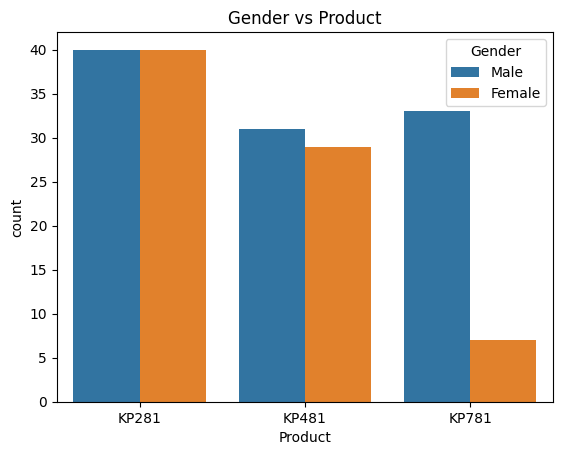

In [906]:
sns.countplot(x=A['Product'],hue = A['Gender'],data=A)
plt.title("Gender vs Product")
plt.show()

**From the graph**:
1.   KP281 treadmill is bought equally by both gender's.
2.   KP781 is highly bought by males compared to the females.

*   **Age impact on Product purchased**

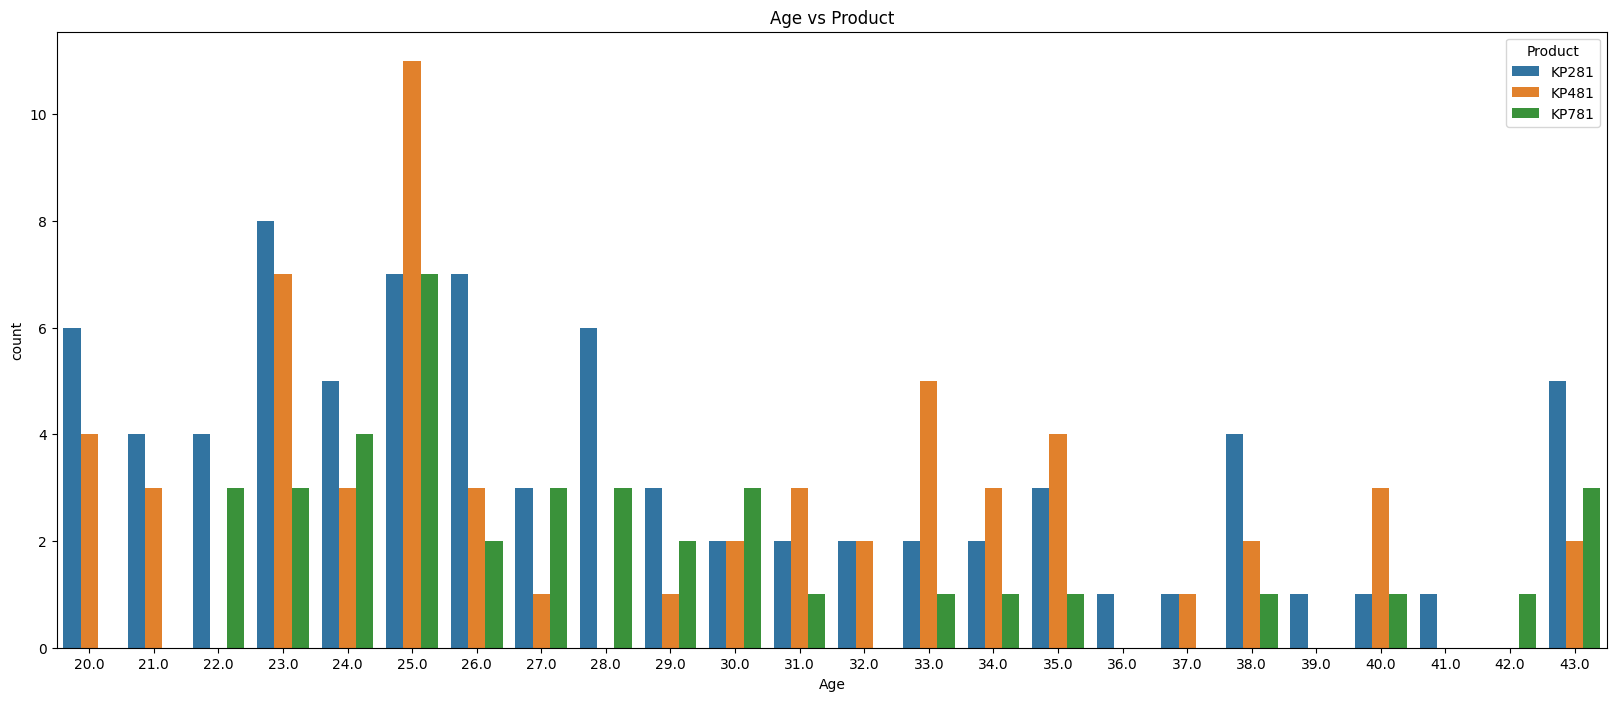

In [907]:
plt.figure(figsize=(20,8))
sns.countplot(x=A['Age'],hue = A['Product'],data=A)
plt.title("Age vs Product")
plt.show()

**From the graph:**
1.   KP481 & KP781 treadmill is highly purchased by the customer's of age '25'.
2.   Customers with age '23' bought KP281 treadmill in more compared to the other treadmill's.

*   **Education impact on Product purchased**

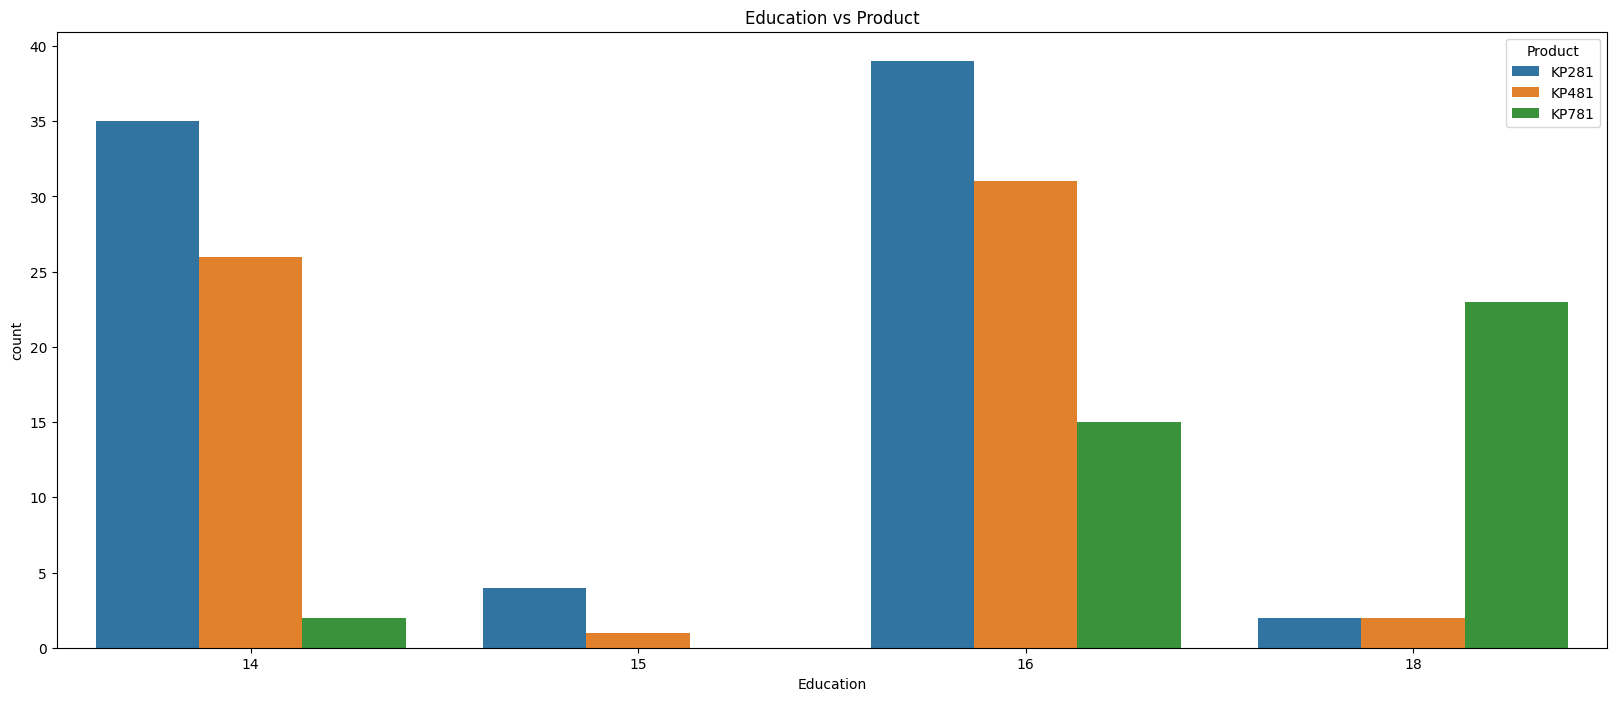

In [908]:
plt.figure(figsize=(20,8))
sns.countplot(x=A['Education'],hue = A['Product'],data=A)
plt.title("Education vs Product")
plt.show()

**From the graph:**
1.   Customer's with 16 years of education bought most number of treadmill's.
2.   'KP781' treadmill is highly purchased by the customer's with 18 years of education.

*   **Usage impact on Product purchased**

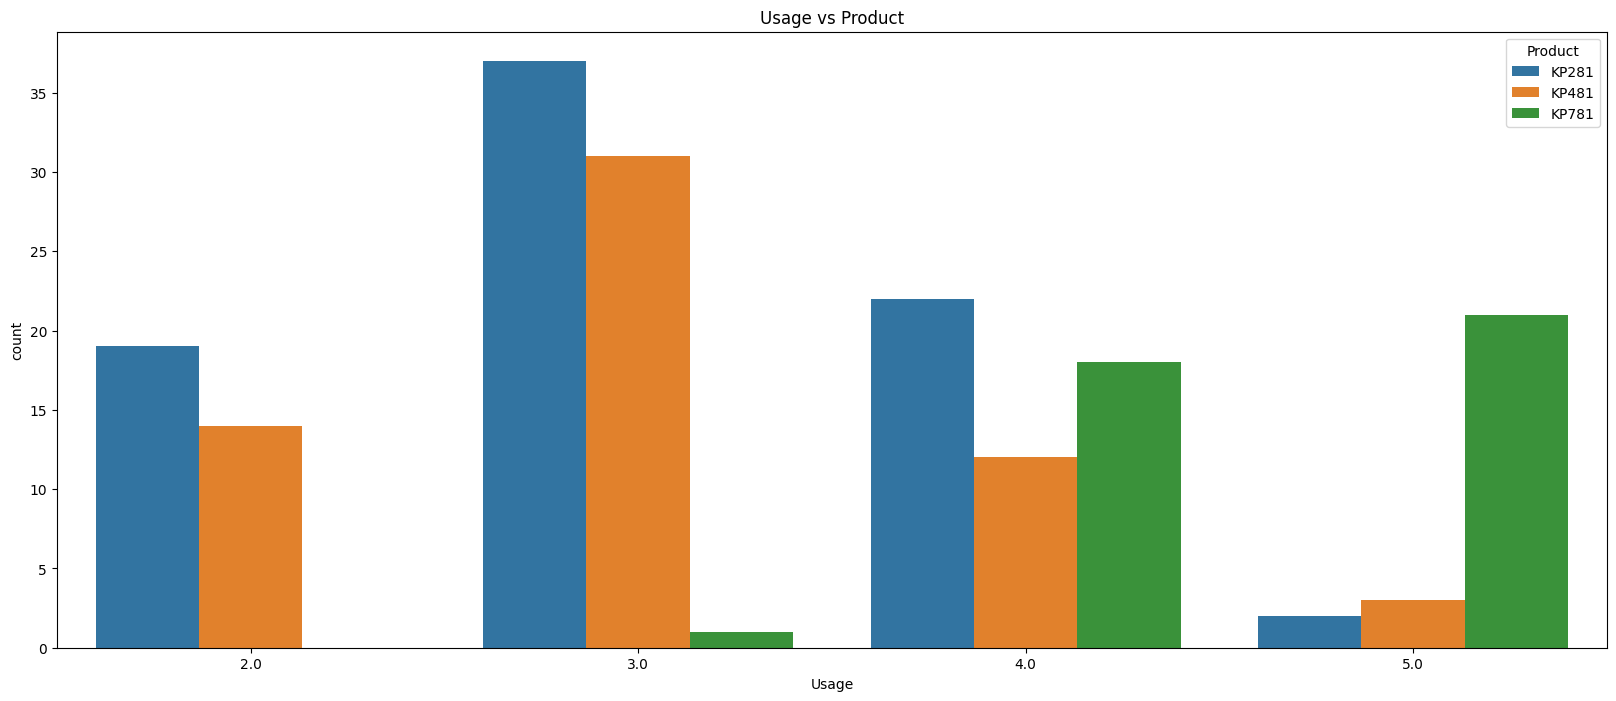

In [909]:
plt.figure(figsize=(20,8))
sns.countplot(x=A['Usage'],hue = A['Product'],data=A)
plt.title("Usage vs Product")
plt.show()

**From the graph:**
1.   On average the customer is using a treadmill 3 times a week.
2.   'KP281' treadmill is mostly used in a week.

*   **Fitness impact on Product purchased**

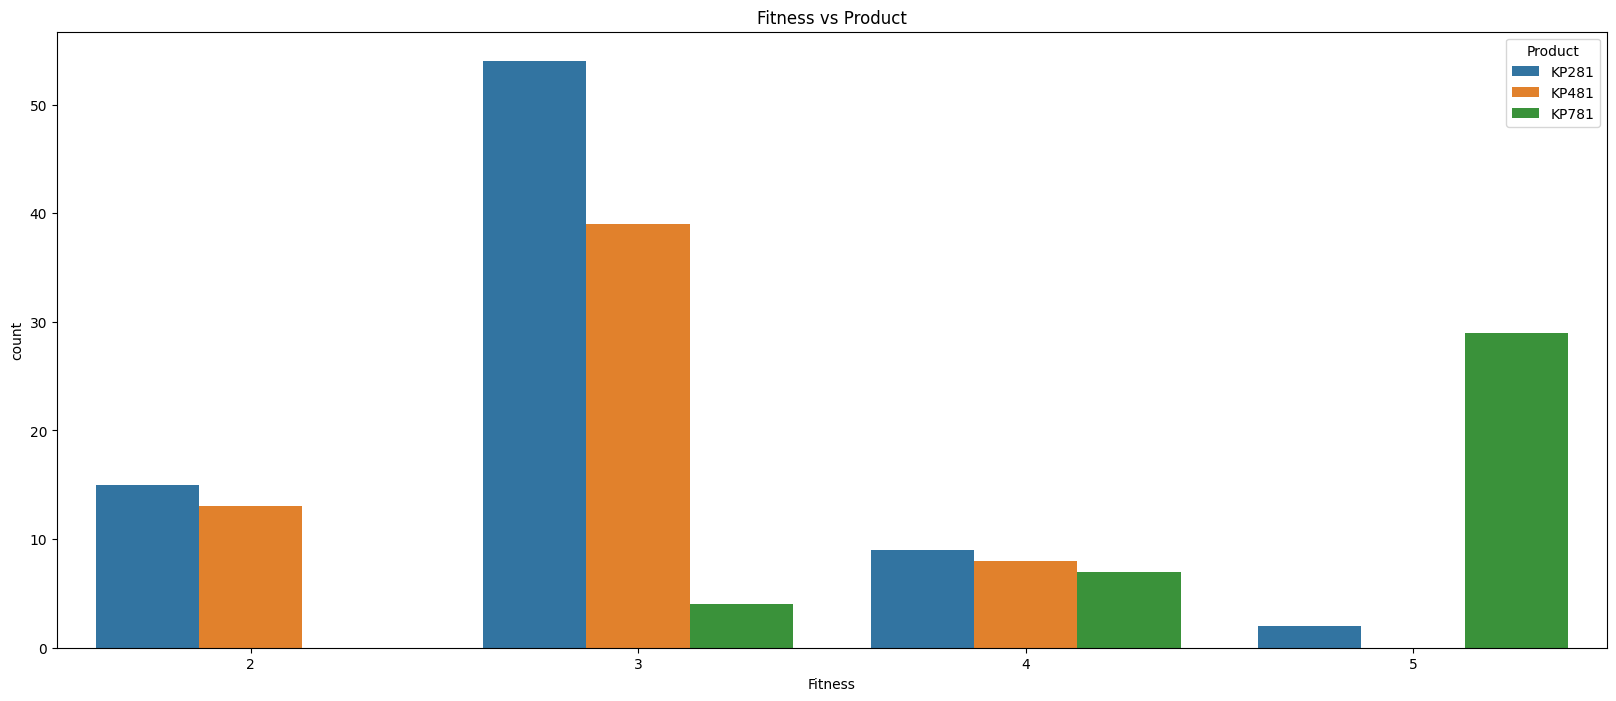

In [910]:
plt.figure(figsize=(20,8))
sns.countplot(x=A['Fitness'],hue = A['Product'],data=A)
plt.title("Fitness vs Product")
plt.show()

**From the graph:**
1.   On average a customer is having a fitness score of 3 i.e "average body"
2.   Customers using 'KP781' treadmill have a very good fitness score.

*   **Miles impact on Product purchased**

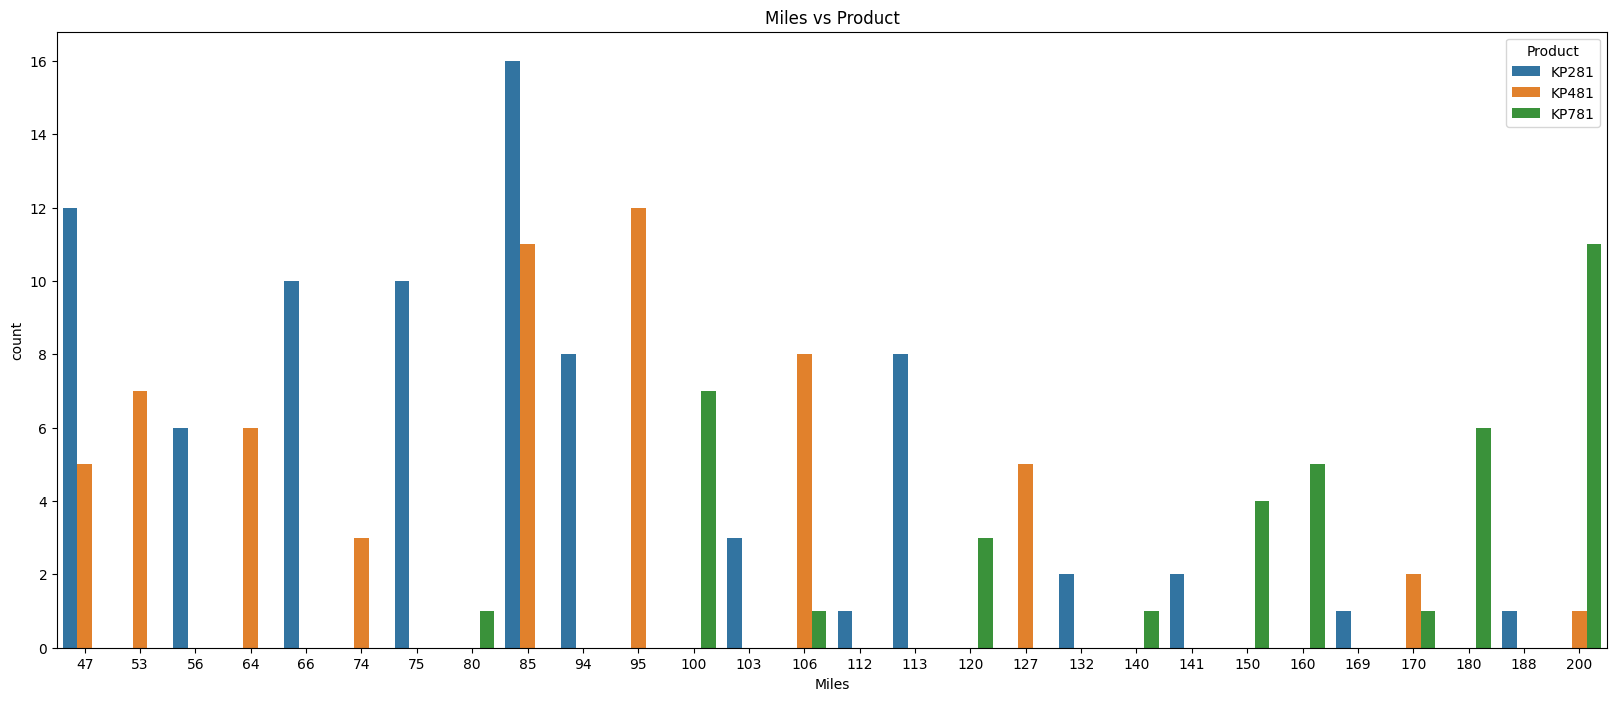

In [911]:
plt.figure(figsize=(20,8))
sns.countplot(x=A['Miles'],hue = A['Product'],data=A)
plt.title("Miles vs Product")
plt.show()

*   **Income impact on Product purchased**

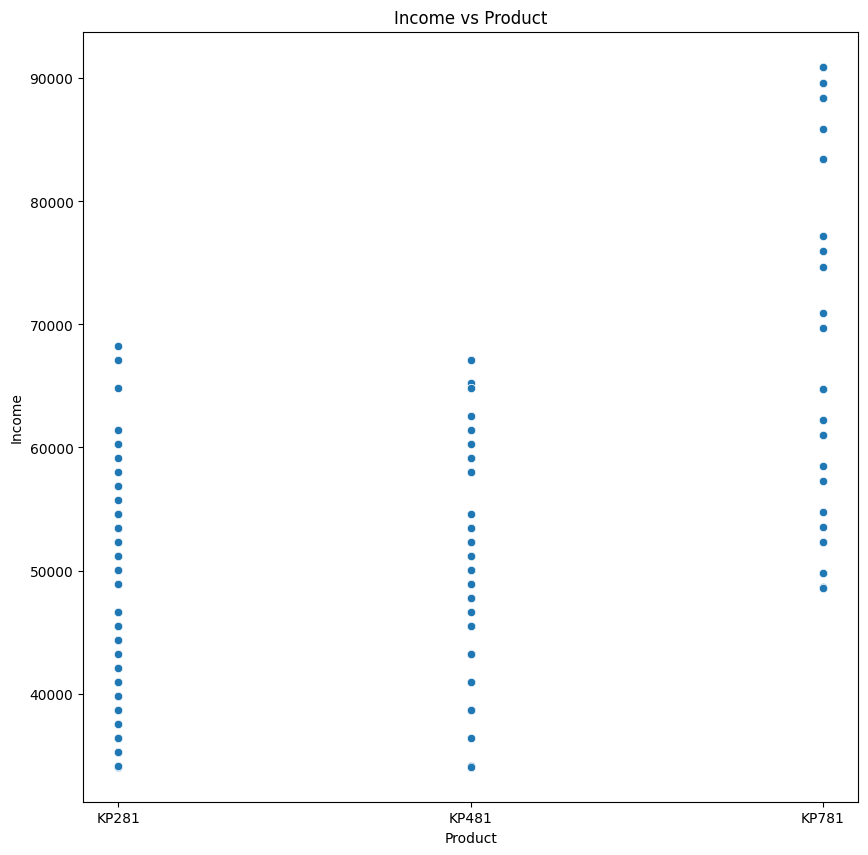

In [912]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=A['Product'],y=A['Income'])
plt.title("Income vs Product")
plt.show()

**From the graph:**
1.   'KP281' highly purchased by the customers earning in between 35000 to 65000.
2.   'KP481' highly purchased by the customers earning in between 45000 to 65000.
1.   'KP781' highly purchased by the customers earning more than 65000.

*   **Count of different number of treadmill's purchased**

In [913]:
pd.crosstab(A['Product'],A['Product'].count())

col_0,180
Product,
KP281,80
KP481,60
KP781,40



Total 180 customers bought different treadmill's:
1.   80 customers bought KP281 treadmill.
2.   60 customers bought KP481 treadmill.
3.   40 customers bought KP781 treadmill.







*   **Marginal Probability**

In [914]:
pd.crosstab(A['Product'],A['Product'].count(),normalize="all")

col_0,180
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


From the table:

1.   44.4% of customers bought KP281 tradmill.
2.   33.3% of customers bought KP481 tradmill.
3.   22.2% of customers bought KP781 tradmill.

*   **Products purchased per gender**

In [915]:
pd.crosstab(A['Product'],A['Gender'])

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33



From the table:
1.   40 females & 40 males bought KP281 treadmill.
2.   29 females & 31 males bought KP481 treadmill.
3.   07 females & 33 males bought KP781 treadmill.

In [916]:
pd.crosstab(A['Product'],A['Gender'],normalize="index")

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


By the crosstable:

*   Out of 100% sales of KP281, 50% were bought by females and 50% by males.
*   Out of 100% sales of KP481, 48.3% were bought by females and 51.7% by males.
*   Out of 100% sales of KP781, 17.5% were bought by females and 82.5% by males.

In [917]:
pd.crosstab(A['Product'],A['Gender'],normalize="columns")

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


Analysis from table:


*   52.6% of females & 38.4% of males bought KP281 treadmill.
*   38.1% of females & 29.8% of males bought KP481 treadmill.
*   09.2% of females & 31.7% of males bought KP781 treadmill.





# **Conclusions**

**KP281**

*   It is highly purchased by the customers of age 20-28.
*   It is highly purchased by the customers who are marrried.
*   It is equally purchased by both male and female customers.
*   It is purchased by the customers earning in between 35000 to 65000.
*   It is mostly used by the customer's in a week.

**KP481**

*   It is highly purchased by the customers of age 23-25.
*   It is highly purchased by the customers who are marrried.
*   It is highly purchased by both male customers.
*   It is more likely purchased by the customers earning in between 45000 to 65000.

**KP781**

*   It is highly purchased by the customers of age 25-30.
*   It is highly purchased by the customers who are marrried.
*   It is highly purchased by both male customers.
*   It is more likely purchased by the customers earning more than 65000.
*   It is highly purchased by the customer's with 18 years of education.
*   Customer's uses this treadmill have good fitness scores.

# **Recommendations**

*   Aerfit Business has to create awarness or focus on the female customers on buying treadmill's
*   It has to increase their sales by focusing on single's to purchase more treadmill's.
*   Business needs to make changes to target customers of age 40 and above to purchase treadmill's.
*   Business needs to make it charges affordable to customers as KP781 is less purchased than KP281,KP481.Most of the customers are not earning more than 60000.